<a href="https://colab.research.google.com/github/sherlockieee/cs156/blob/main/lba/CS156_LBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thanks to Finn for helping me with the code, and Khanh for our coworking sessions.

Code available here: https://github.com/sherlockieee/cs156/tree/main/lba

In [61]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

## Image preprocessing

In [7]:
#This runs for 3 minutes
def image_preprocessing(url):
    img = mpimg.imread(url) / 255
    img = resize(img, (128, 128, 3))
    img = np.reshape(img, (128, 384))
    return img

images = glob('data/*')
data = np.array([image_preprocessing(image) for image in images])

In [8]:
print(data.shape)
#flatten data
data_shaped = data.reshape(data.shape[0], np.product(data.shape[1:]))
print(data_shaped.shape)


(27, 128, 384)
(27, 49152)


In [50]:
#normalizing the data before performing PCA to mean = 0 and variance = 1
#this is so that all variables have the same standard deviation 
#so all variables carry the same weight

scale = StandardScaler().fit(data_shaped)
normalized_data = scale.transform(data_shaped)
print(normalized_data.shape)

(27, 49152)


## Principal Component Analysis

In [43]:
pca = decomposition.PCA(n_components=2)  
pca.fit(normalized_data) 
X = pca.transform(normalized_data) 
print(X.shape)

(27, 2)


## Visual inspection

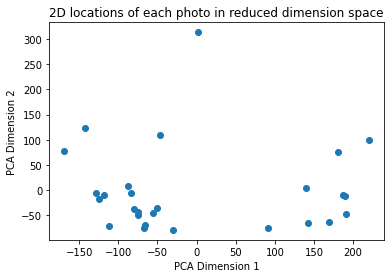

In [44]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("2D locations of each photo in reduced dimension space")
plt.show()

## Image reconstruction in low dimension

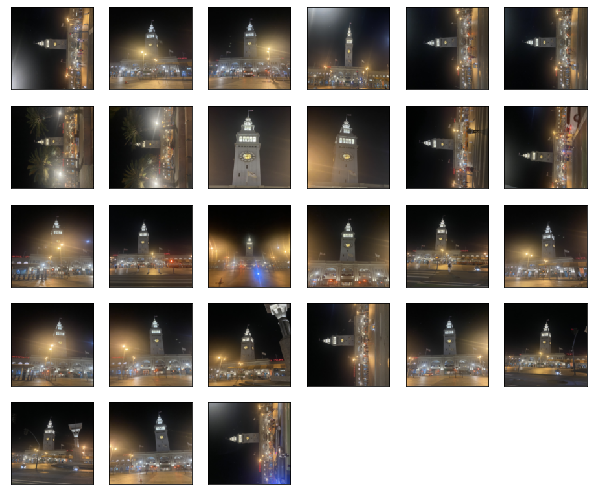

In [24]:
fig = plt.figure(figsize=(8, 8)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1) 

# original images
for i in range(len(data)): 
  ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[]) 
  ax.imshow(data_shaped[i].reshape(128, 128, 3), interpolation='nearest')

In [26]:
reconstruct_x = pca.inverse_transform(X)

print(f"Total variance explained: {sum(pca.explained_variance_ratio_)}")

Total variance explained: 0.46416515895439303


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

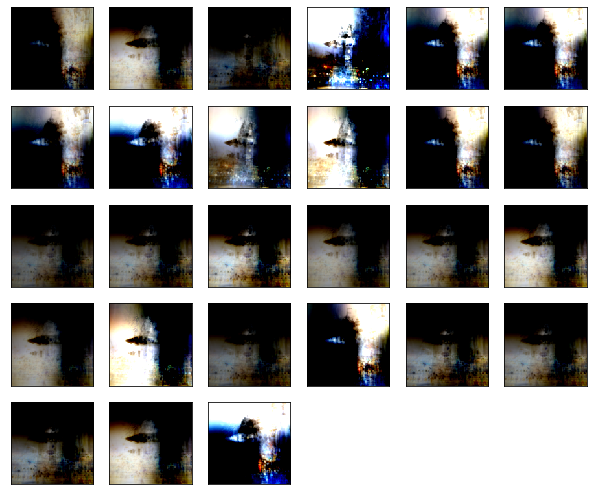

In [27]:
fig = plt.figure(figsize=(8, 8)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1) 

# reconstructed images
for i in range(len(data)): 
  ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[]) 
  ax.imshow(reconstruct_x[i].reshape(128, 128, 3), interpolation='nearest')

## Reconstruction of new point


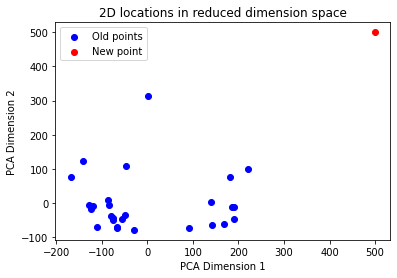

In [45]:
#choose a random point that is far away
new_X = (500, 500)

plt.scatter(X[:,0], X[:,1], color = "blue", label = "Old points")
plt.scatter(new_X[0], new_X[1], color = "red", label="New point")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.title("2D locations in reduced dimension space")
plt.show()

In [54]:
#doing inverse transformation
reconstruct_new_x = pca.inverse_transform(new_X)
print(reconstruct_new_x.shape)

(49152,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


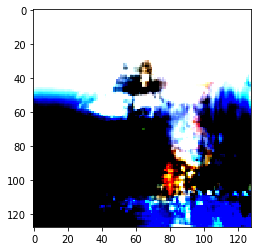

In [41]:
#image reconstruction
plt.imshow(reconstruct_new_x.reshape(128, 128, 3), interpolation='nearest')
plt.show()

We can see that the image reconstruction is not that successful, I wonder if it's because it's dark and hence harder for us to see the reconstructed image (because it seems that the dimensions still explain roughly 47% of the variance) or due to the shape of the images (some were rotated) which create inconsistency, making it harder and less clear to reconstruct.

## Would 3D do better?

In [55]:
pca_3d = decomposition.PCA(n_components=3)  
pca_3d.fit(normalized_data) 
X = pca_3d.transform(normalized_data) 
print(X.shape)

(27, 3)


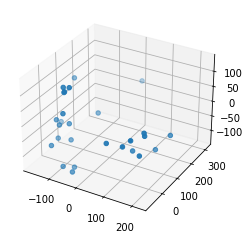

In [56]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(X[:,0], X[:,1], X[:,2])


In [59]:
reconstruct_x = pca_3d.inverse_transform(X)

print(f"Total variance explained: {sum(pca_3d.explained_variance_ratio_)}")

Total variance explained: 0.5698174100382954


Seems like we improve our accuracy by ~10%!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

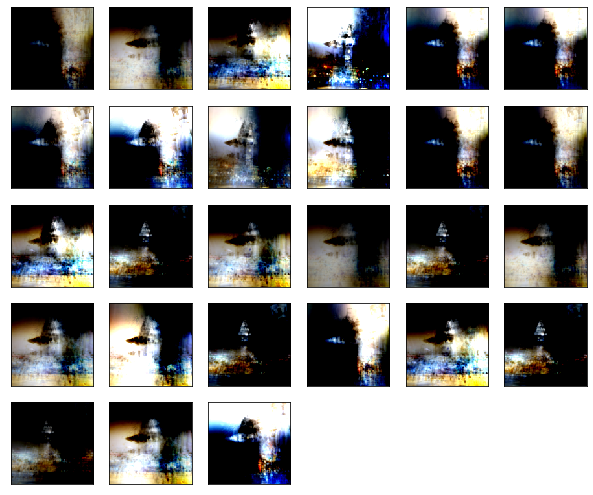

In [60]:
fig = plt.figure(figsize=(8, 8)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1) 

# reconstructed images
for i in range(len(data)): 
  ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[]) 
  ax.imshow(reconstruct_x[i].reshape(128, 128, 3), interpolation='nearest')

Don't think it makes a big difference for image reconstruction tho ¯\\_(ツ)_/¯